In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# optional: nicer styles
plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')


In [10]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/climate-change-dataset/climate_change_dataset.csv


In [12]:
import pandas as pd

df = pd.read_csv('/kaggle/input/climate-change-dataset/climate_change_dataset.csv')
df.head()


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [14]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [16]:
YEAR = 'Year'
COUNTRY = 'Country'
TEMP = 'Avg Temperature (°C)'
CO2 = 'CO2 Emissions (Tons/Capita)'
SEA = 'Sea Level Rise (mm)'
RAIN = 'Rainfall (mm)'
RENEW = 'Renewable Energy (%)'
FOREST = 'Forest Area (%)'
EVENTS = 'Extreme Weather Events'


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


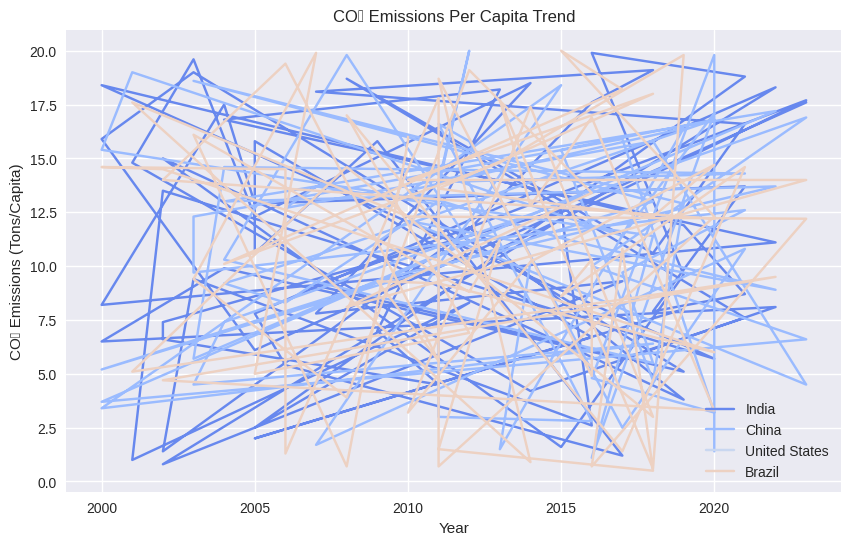

In [17]:
import matplotlib.pyplot as plt

countries = ['India', 'China', 'United States', 'Brazil']
df_filtered = df[df[COUNTRY].isin(countries)]

plt.figure(figsize=(10,6))

for country in countries:
    data = df_filtered[df_filtered[COUNTRY] == country]
    plt.plot(data[YEAR], data[CO2], label=country)

plt.title('CO₂ Emissions Per Capita Trend')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Tons/Capita)')
plt.legend()
plt.grid(True)
plt.show()


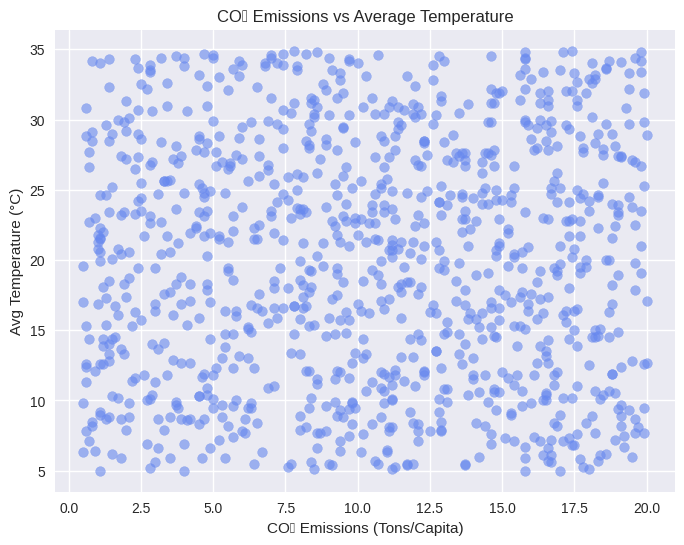

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(df[CO2], df[TEMP], alpha=0.6)
plt.title('CO₂ Emissions vs Average Temperature')
plt.xlabel('CO₂ Emissions (Tons/Capita)')
plt.ylabel('Avg Temperature (°C)')
plt.grid(True)
plt.show()


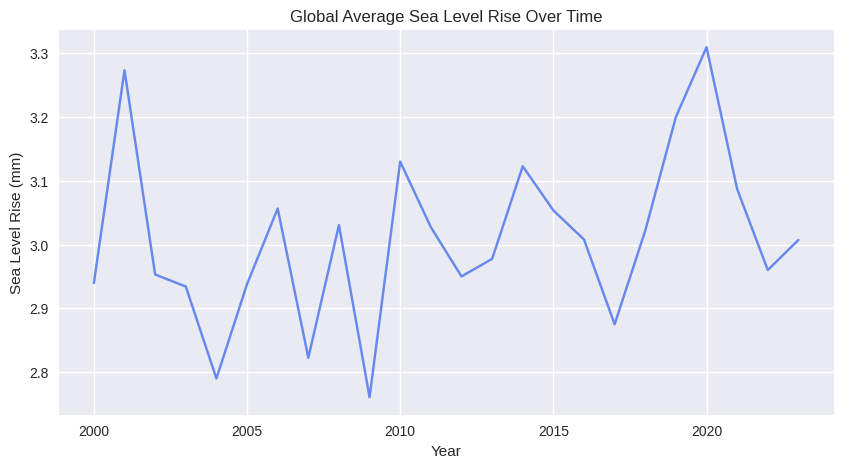

In [19]:
global_sea = df.groupby(YEAR)[SEA].mean()

plt.figure(figsize=(10,5))
plt.plot(global_sea.index, global_sea.values)
plt.title('Global Average Sea Level Rise Over Time')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.grid(True)
plt.show()

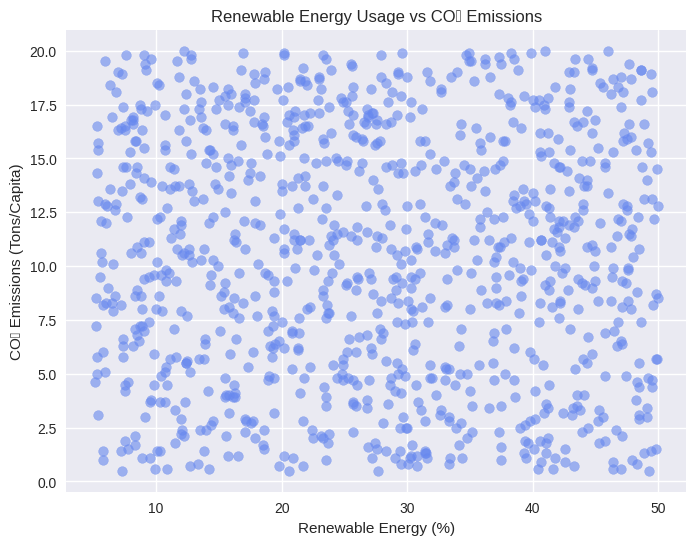

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df[RENEW], df[CO2], alpha=0.6)
plt.title('Renewable Energy Usage vs CO₂ Emissions')
plt.xlabel('Renewable Energy (%)')
plt.ylabel('CO₂ Emissions (Tons/Capita)')
plt.grid(True)
plt.show()


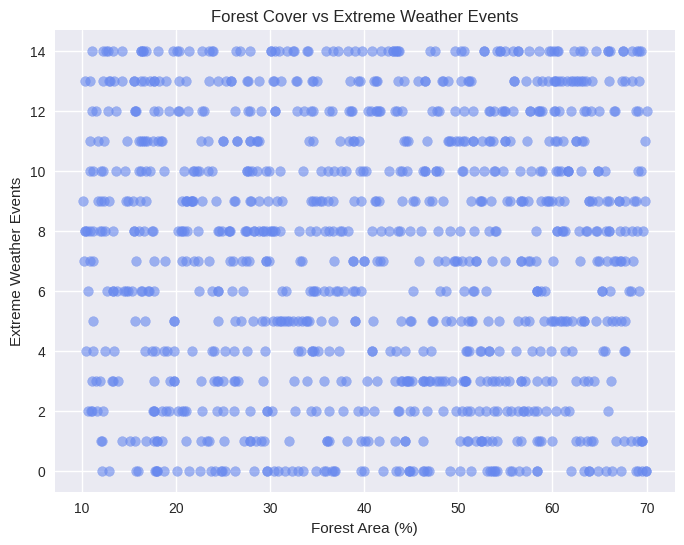

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df[FOREST], df[EVENTS], alpha=0.6)
plt.title('Forest Cover vs Extreme Weather Events')
plt.xlabel('Forest Area (%)')
plt.ylabel('Extreme Weather Events')
plt.grid(True)
plt.show()


In [22]:
def climate_suggestion(row):
    if row[CO2] > 5 and row[RENEW] < 30:
        return "Increase renewable energy adoption"
    elif row[FOREST] < 20:
        return "Urgent reforestation needed"
    elif row[EVENTS] > 10:
        return "Climate resilience planning required"
    else:
        return "On moderate sustainability path"

df['Suggestion'] = df.apply(climate_suggestion, axis=1)
df[['Country', 'Suggestion']].head()

,Country,Suggestion
0,UK,Increase renewable energy adoption
1,USA,On moderate sustainability path
2,France,On moderate sustainability path
3,Argentina,Urgent reforestation needed
4,Germany,Increase renewable energy adoption
